# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection

In [71]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
%matplotlib inline

**1. Загрузить датасет**

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

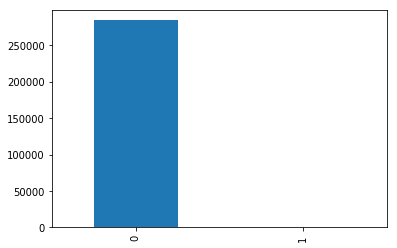

In [7]:
df['Class'].value_counts().plot(kind='bar')
plt.show()

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [12]:
df.groupby('Class').sum()['Amount'].round(0)

Class
0    25102462.0
1       60128.0
Name: Amount, dtype: float64

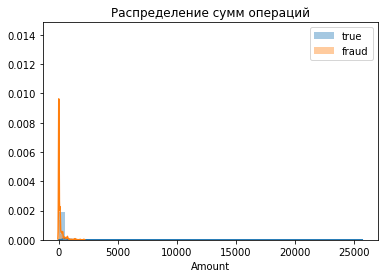

In [13]:
sns.distplot(df[df['Class']==0]['Amount'])
sns.distplot(df[df['Class']==1]['Amount'])
plt.title('Распределение сумм операций')
plt.legend(['true', 'fraud'])
plt.show()

**5. Построить графики histograms для всех значений**

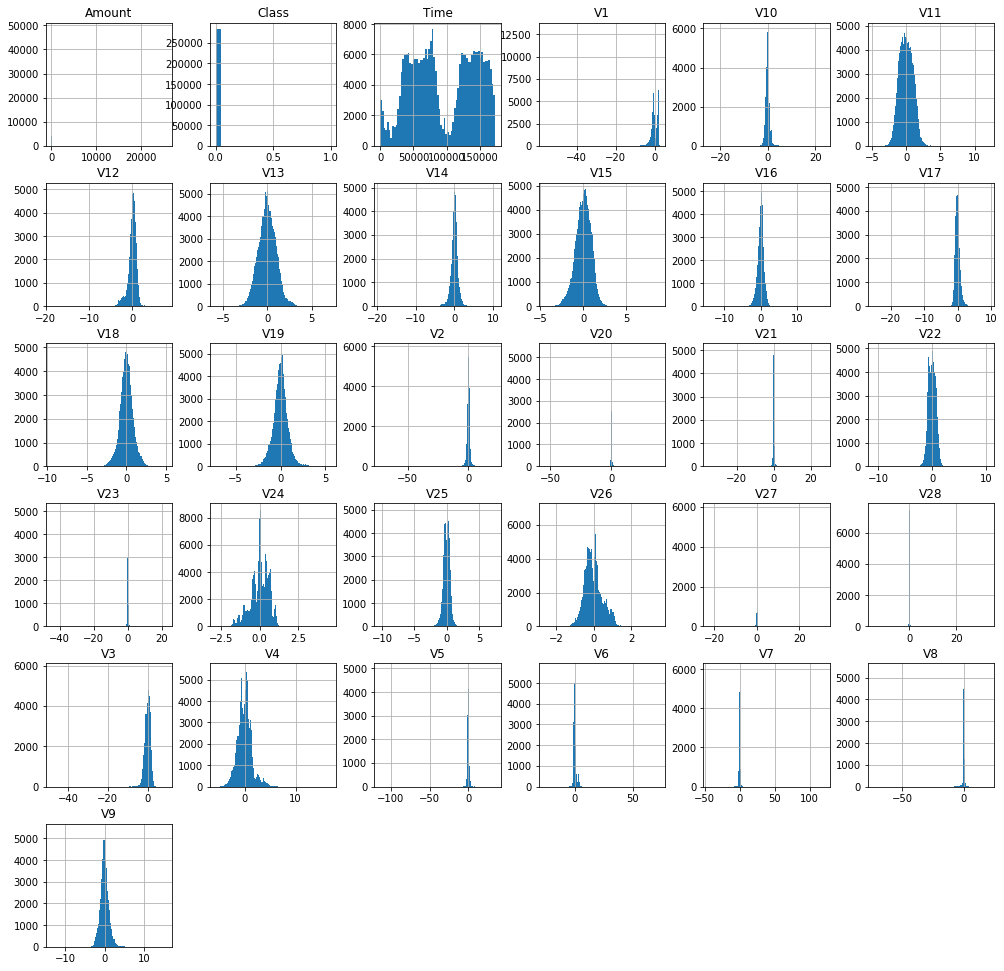

In [18]:
df.hist(figsize=(17,17),bins='auto')
plt.show()

**6. Построить матрицу корреляций для всех значений**

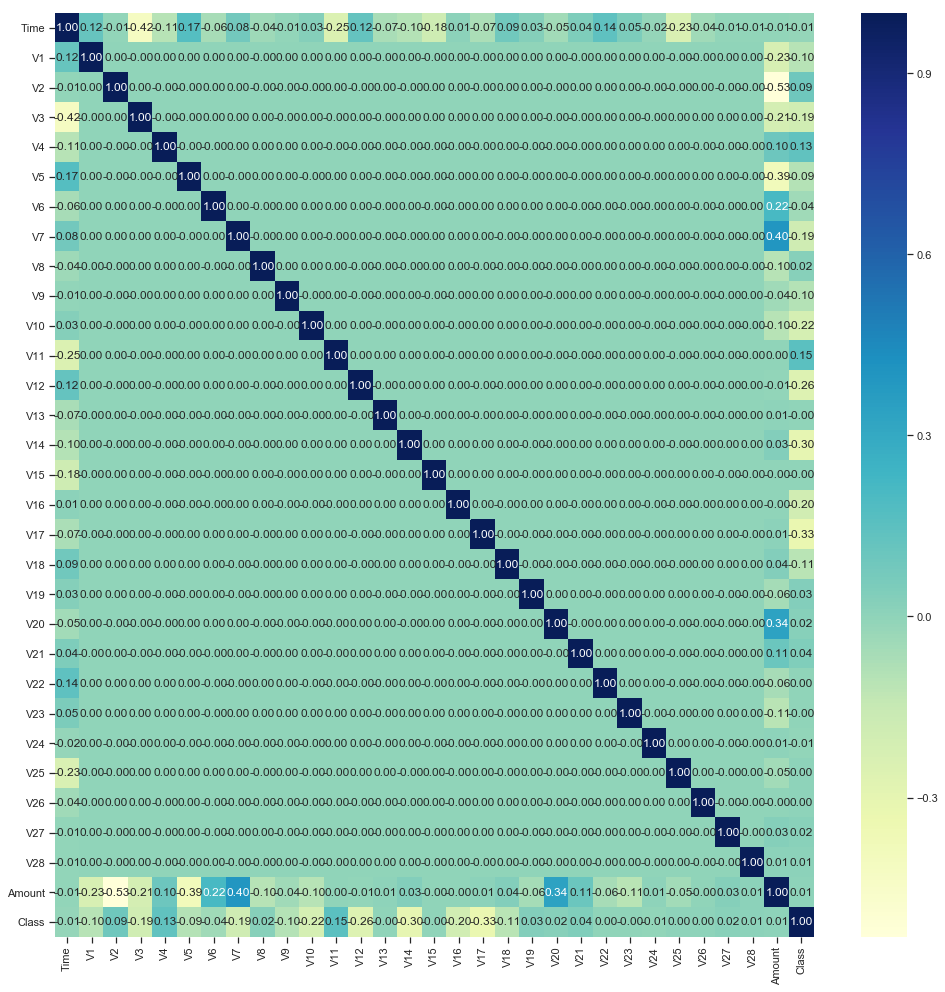

In [169]:
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap="YlGnBu",xticklabels=True, yticklabels=True)
plt.gcf().set_size_inches(17,17)

**7. Выбрать несколько элементов исходя из матрицы корреляций для предсказания таргет значения Class. Построить модель линейной регрессии. Разделить датасет на 80% тренировочных данных и 20% тестовых данных. Для fit метода использовать тренировочные данные, проверить качество модели на тестовых данных. Почему модель дает такой результат?**

Для разделения на тренировочный датасет и тестовый датасет можно использовать функцию  из sklearn:

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [50]:
y=df['Class']
X=df.drop(columns=['Class'])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5278270548434105

Скорее всего, модель предсказывает с плохим качеством, потому что данные несбалансированы по классу.

**8. Чтобы уравновесить датасет по классу Class, выберем одинаковое количество элементов из датасета по классу.** Необходимо посчитать минимальное количество (N) элементов, посчитанное в задаче 3. Выбрать N элементов рандомно из класса, имеющего бОльшее количество элементов, и все элементы из класса имеющего меньшее количество. Таким образом, мы уравновесим датасет по количеству элементов. Смоделировать линейную регрессию на полученном датасете. Посчитать качество модели. Получилось ли улучшить модель? Если да, то засчет чего?

In [110]:
df1=df[df['Class']==0].iloc[np.random.randint(0,len(df),size=492)].append(df[df['Class']==1])
len(df1)

984

In [111]:
y=df1['Class']
X=df1.drop(columns=['Class'])

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6273242620577955

Модель улучшилась за счет того, что данные стали сбалансированы.

**9. Построить boxplot графики для 4ех негативно коррелирующих элементов и 4 позитивно коррелирующих элементов для полученного в шаге 8 датасете.** Пример boxplot:

sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])

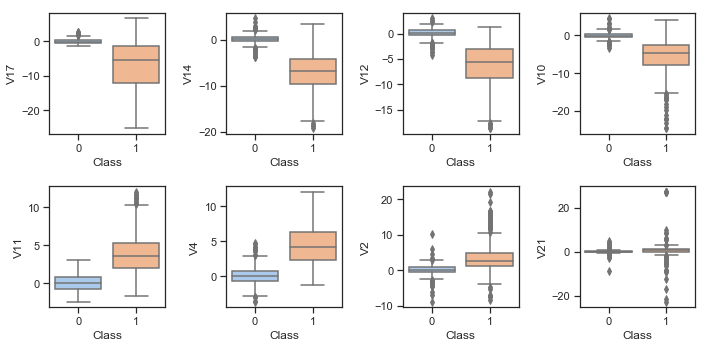

In [155]:
pos_=['V17','V14','V12','V10','V11','V4','V2','V21']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))
for i, feat in enumerate(pos_): 
    ax = axes[int(i/4),i%4] 
    sns.boxplot(x='Class', y=feat, data=df1, ax=ax) 
    ax.set_xlabel('Class') 
    ax.set_ylabel(feat) 
fig.tight_layout()

**10. Из графиков, полученных на предыдущем шаге, убрать выбросы методом выборки элементов из интерквартильного интервала (взять только те элементы, которые находятся квартилем 0.25 и квартилем 0.75).** Посчитать качество модели и сравнить с предыдущим. Получилось ли улучшить модель? Почему?

In [164]:
pos1=['V17','V14','V12','V10','V11','V4','V2','V21','Class']
df2=df[(df>=df.quantile(0.25, axis = 0))&(df<=df.quantile(0.75, axis = 0))][pos1].dropna()

In [165]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1810 entries, 71 to 284430
Data columns (total 9 columns):
V17      1810 non-null float64
V14      1810 non-null float64
V12      1810 non-null float64
V10      1810 non-null float64
V11      1810 non-null float64
V4       1810 non-null float64
V2       1810 non-null float64
V21      1810 non-null float64
Class    1810 non-null float64
dtypes: float64(9)
memory usage: 141.4 KB


In [166]:
df2['Class'].value_counts()

0.0    1810
Name: Class, dtype: int64

In [167]:
y=df2['Class']
X=df2.drop(columns=['Class'])

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

Получается, мошеннические опрерации имеют параметры вне интерквартильного интервала.